In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_json("exps.jsonl", lines=True)
df = df[df["params.dataset.path"] == "bdsaglam/drop-musique-mini"].copy()
print(len(df))
df.head()

20


,commit,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,0dc1ac9f99cc3c539cdd54ae3981e8c4f52e6bd3,e7197b9530afa0b74197ac5e6e711e3ccd1d4b0e,hated-fore,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-8b,0.5,empty.txt,icq-format.txt,...,59,579.779661,1048.349393,169,260.5,342.0,439.00,6973,REASONING,empty:icq-format:manual/reasoning
1,0dc1ac9f99cc3c539cdd54ae3981e8c4f52e6bd3,39ef92d375302bce71bfecb1c83a632e0dba789f,whity-wave,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-8b,0.5,empty.txt,icq-format.txt,...,76,387.815789,200.796329,149,250.0,336.5,470.75,1166,REASONING,empty:icq-format:manual/reasoning
2,0dc1ac9f99cc3c539cdd54ae3981e8c4f52e6bd3,de60a8a11f645e0b77cf84ffdabb82aacb3b0123,spicy-bael,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-8b,0.5,empty.txt,icq-format.txt,...,60,423.283333,332.267816,168,255.5,334.5,460.25,2113,REASONING,empty:icq-format:manual/reasoning
3,0dc1ac9f99cc3c539cdd54ae3981e8c4f52e6bd3,402223512ca8b9922f56a87af12c575694e2727f,sport-kale,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-8b,0.5,empty.txt,icq-format.txt,...,67,381.910448,202.044904,159,257.0,317.0,403.50,966,REASONING,empty:icq-format:manual/reasoning
4,0dc1ac9f99cc3c539cdd54ae3981e8c4f52e6bd3,f59054d456e353af61838756bbd55dabeacba25b,loose-grub,bdsaglam/drop-musique-mini,default,train,deepseek-r1-llama-8b,0.5,empty.txt,icq-format.txt,...,71,367.338028,213.886815,137,236.0,328.0,391.00,1354,REASONING,empty:icq-format:manual/reasoning


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = ['metrics.exact_match', 'metrics.f1']
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.model",
    "params.qa.temperature",
    "params.qa.technique",
    "params.qa.instruction",
    "params.qa.n_shot",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,commit,name,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.n_sc,params.run,...,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique,params.qa.instruction
0,0dc1ac9f99cc3c539cdd54ae3981e8c4f52e6bd3,hated-fore,deepseek-r1-llama-8b,0.5,empty.txt,icq-format.txt,manual/reasoning.json,0,1,1,...,59,579.779661,1048.349393,169,260.5,342.0,439.00,6973,REASONING,empty:icq-format:manual/reasoning
1,0dc1ac9f99cc3c539cdd54ae3981e8c4f52e6bd3,sport-kale,deepseek-r1-llama-8b,0.5,empty.txt,icq-format.txt,manual/reasoning.json,0,1,2,...,67,381.910448,202.044904,159,257.0,317.0,403.50,966,REASONING,empty:icq-format:manual/reasoning
2,0dc1ac9f99cc3c539cdd54ae3981e8c4f52e6bd3,spicy-bael,deepseek-r1-llama-8b,0.5,empty.txt,icq-format.txt,manual/reasoning.json,0,1,3,...,60,423.283333,332.267816,168,255.5,334.5,460.25,2113,REASONING,empty:icq-format:manual/reasoning
3,0dc1ac9f99cc3c539cdd54ae3981e8c4f52e6bd3,prone-eric,deepseek-r1-llama-8b,0.5,empty.txt,icq-format.txt,manual/reasoning.json,1,1,1,...,78,340.294872,177.622985,150,219.5,298.5,398.50,1127,REASONING,empty:icq-format:manual/reasoning
4,0dc1ac9f99cc3c539cdd54ae3981e8c4f52e6bd3,loose-grub,deepseek-r1-llama-8b,0.5,empty.txt,icq-format.txt,manual/reasoning.json,1,1,2,...,71,367.338028,213.886815,137,236.0,328.0,391.00,1354,REASONING,empty:icq-format:manual/reasoning


In [5]:
avg_df = (
    df.groupby(target_param_cols)[["name", *metric_cols]]
    .agg({"name": tuple, "metrics.exact_match": "mean", "metrics.f1": "mean"})
    .reset_index()
)
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
best_df = avg_df.loc[
    max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
best_df.drop(columns=['name'])

,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
2,llama-3-8b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,0.370000,0.599337
4,llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,1,0.326667,0.554395
0,deepseek-r1-llama-8b,0.5,REASONING,empty:icq-format:manual/reasoning,0,0.130000,0.396456


In [6]:
for model in avg_df['params.qa.model'].unique():
    _df = avg_df[avg_df['params.qa.model'] == model].sort_values("metrics.f1", ascending=False)
    print('-'*120)
    display(_df)

------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
0,deepseek-r1-llama-8b,0.5,REASONING,empty:icq-format:manual/reasoning,0,"(hated-fore, sport-kale, spicy-bael)",0.130000,0.396456
1,deepseek-r1-llama-8b,0.5,REASONING,empty:icq-format:manual/reasoning,1,"(prone-eric, loose-grub, whity-wave)",0.053333,0.296865


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
2,llama-3-8b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,"(None,)",0.370000,0.599337
4,llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,1,"(fatty-doit, woven-erns, purer-gram)",0.326667,0.554395
5,llama-3-8b,0.5,DIRECT,direct/format-few:cq:manual/direct,0,"(nubby-gray, loyal-lees, worst-gude)",0.413333,0.553962
6,llama-3-8b,0.5,DIRECT,direct/format-few:cq:manual/direct,1,"(pawky-flex, gypsy-unau, ashen-keek)",0.373333,0.540744
3,llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,0,"(sooty-hoot, niffy-jags, withy-hows)",0.293333,0.499110


------------------------------------------------------------------------------------------------------------------------


,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,name,metrics.exact_match,metrics.f1
7,qwen-2.5-32b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,"(None,)",0.37,0.599337


In [7]:
zs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 0]
zs_max_f1_rows = zs_avg_df.groupby(["params.qa.technique", "params.qa.model"])["metrics.f1"].idxmax()
zs_best_df = zs_avg_df.loc[
    zs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
zs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
2,"(None,)",llama-3-8b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,0.370000,0.599337
7,"(None,)",qwen-2.5-32b,0.0,DIRECT,direct/format-few:cq:manual/direct,0,0.370000,0.599337
3,"(sooty-hoot, niffy-jags, withy-hows)",llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,0,0.293333,0.499110
0,"(hated-fore, sport-kale, spicy-bael)",deepseek-r1-llama-8b,0.5,REASONING,empty:icq-format:manual/reasoning,0,0.130000,0.396456


In [8]:
fs_avg_df = avg_df[avg_df['params.qa.n_shot'] == 1]
fs_max_f1_rows = fs_avg_df.groupby("params.qa.technique")["metrics.f1"].idxmax()
fs_best_df = fs_avg_df.loc[
    fs_max_f1_rows, ["name"] + target_param_cols + metric_cols[:2]
].sort_values("metrics.f1", ascending=False)
fs_best_df

,name,params.qa.model,params.qa.temperature,params.qa.technique,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1
4,"(fatty-doit, woven-erns, purer-gram)",llama-3-8b,0.5,CCOT,ccot/format-thought:cq:manual/ccot,1,0.326667,0.554395
6,"(pawky-flex, gypsy-unau, ashen-keek)",llama-3-8b,0.5,DIRECT,direct/format-few:cq:manual/direct,1,0.373333,0.540744
1,"(prone-eric, loose-grub, whity-wave)",deepseek-r1-llama-8b,0.5,REASONING,empty:icq-format:manual/reasoning,1,0.053333,0.296865


In [9]:
avg_df[avg_df["params.qa.model"] == "deepseek-r1-llama-70b-tgi"].sort_values("metrics.f1", ascending=False).drop(columns=['params.qa.technique', 'name'])

,params.qa.model,params.qa.temperature,params.qa.instruction,params.qa.n_shot,metrics.exact_match,metrics.f1


In [10]:
def plot_heatmap(df, metric_col):
    instructions = df["params.qa.instruction"].unique()
    n = len(instructions)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    vmin = df[metric_col].min()
    vmax = df[metric_col].max()

    for ax, instruction in zip(axes.flatten(), instructions):
        subset_df = df[df["params.qa.instruction"] == instruction]
        pivot_table = subset_df.pivot_table(
            values=metric_col,
            index="params.qa.temperature",
            columns="params.qa.n_shot",
            aggfunc="mean",
        )
        sns.heatmap(
            pivot_table,
            annot=True,
            fmt=".3f",
            cmap="YlGnBu",
            ax=ax,
            yticklabels=True,
            vmin=vmin,
            vmax=vmax
        )
        ax.set_title(instruction)
        ax.set_xlabel("Number of Few-Shot Examples")
        ax.set_ylabel("Temperature")
        ax.invert_yaxis()

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Add padding between plots

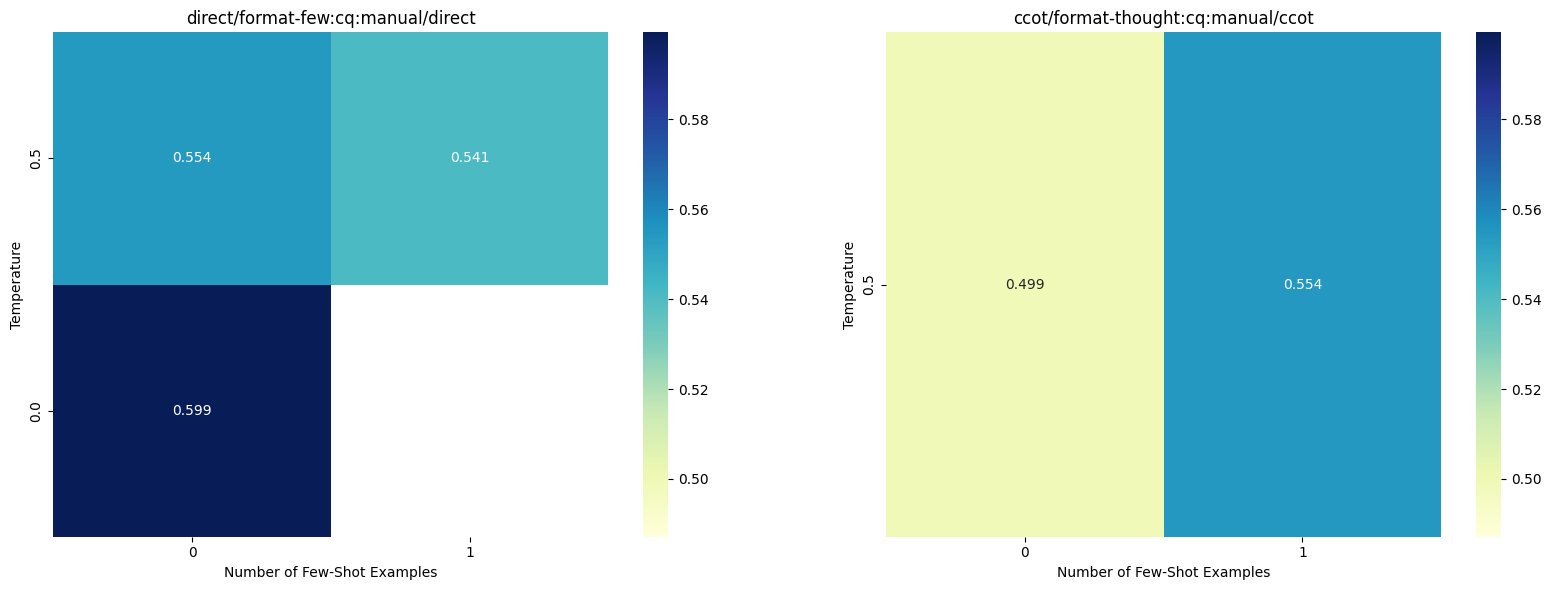

In [11]:
model = 'llama-3-8b'
plot_heatmap(df[df["params.qa.model"] == model], "metrics.f1")

In [12]:
def compare_grid(df):
    models = df["params.qa.model"].unique()
    instructions = df["params.qa.instruction"].unique()
    n = len(models)
    n_cols = 2
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, n_rows * 6))

    # Define a more distinct color palette and map each instruction to a specific color
    palette = sns.color_palette("colorblind", len(instructions))
    instruction_colors = dict(zip(instructions, palette))

    for ax, model in zip(axes.flatten(), models):
        subset_df = df[df["params.qa.model"] == model]
        pivot_table = subset_df.pivot_table(
            values="metrics.f1",
            index="params.qa.temperature",
            columns="params.qa.instruction",
            aggfunc="mean",
        )
        pivot_table.plot(
            title=f"{model}",
            xlabel="Temperature",
            ylabel="F1 Score",
            style="o-",
            ax=ax,
            color=[instruction_colors[instruction] for instruction in pivot_table.columns]
        )
        ax.set_ylim(0, 1)  # Set y-axis limits

    # Remove any empty subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Add padding between plots
    plt.show()


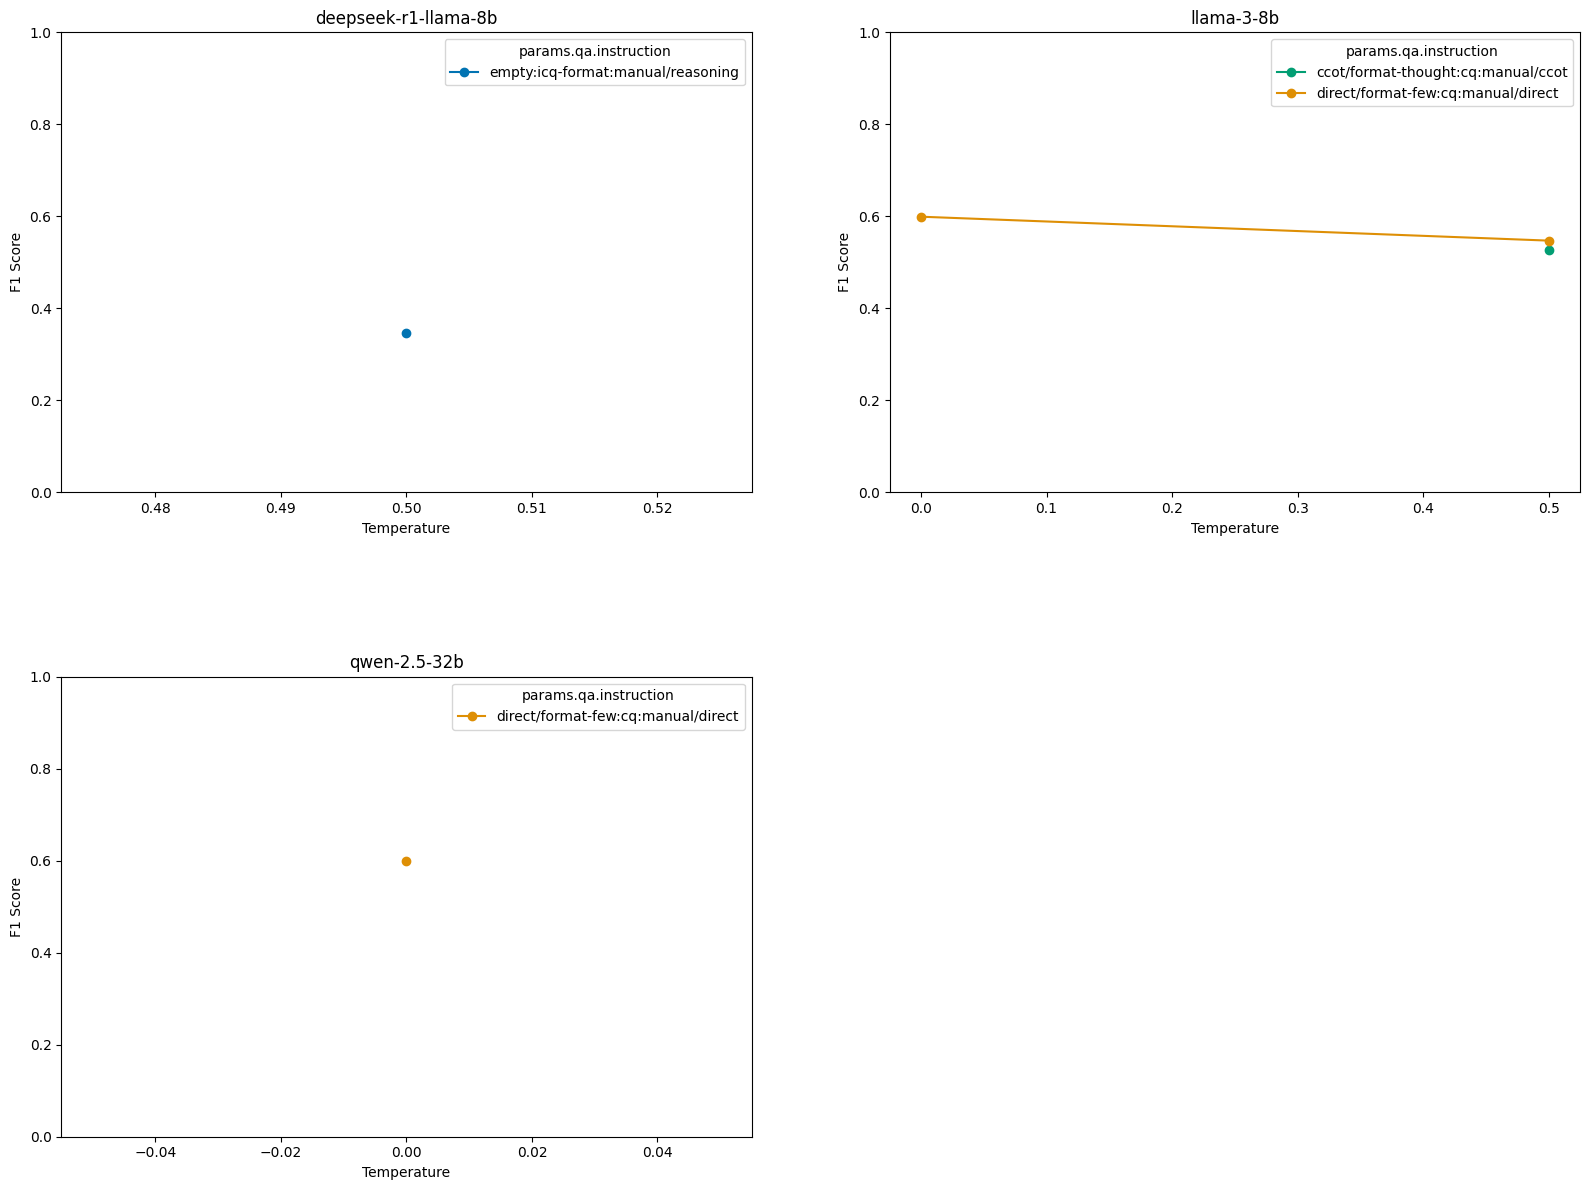

In [13]:
compare_grid(df)